In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
df = pd.read_csv('./Task 3/cytometry_data.tsv', sep='\t', index_col='inds')
df['Time point'] = df['Time point'].astype(int)
df['donor_num'] = df['donor_num'].astype(int)
df['response'] = df['response'].astype(int)
df.head()

,Neutrophils,Eosinophils,Basophils,B_cells,T_cells,NKT_cells,NK_cells,Monocytes,Immature_NK_cells,Mature_NK_CD158+_CD57+,...,gdT_Vdelta2+,gdT_Vdelta2-,Naive_B_cells,Non-switched_Memory_IgM_B_cells,Switched_Memory_IgG+,Switched_Memory_IgA+,Switched_Memory_IgA-_IgG-,Time point,response,donor_num
inds,,,,,,,,,,,,,,,,,,,,,
1,61.409675,0.824102,0.343589,3.844453,19.948739,3.557391,2.919137,9.673985,0.166210,0.438825,...,0.010769,0.900482,2.904248,0.242094,0.279949,0.112244,0.086273,1,0,50
2,64.257310,1.040620,0.335715,1.666845,21.829764,2.095258,5.074820,5.437992,0.203931,0.620319,...,0.102681,0.086994,0.883428,0.162517,0.206272,0.068757,0.110428,1,1,100
3,73.598340,3.131417,1.105466,2.299966,6.354818,0.067537,4.075060,9.000547,0.126261,0.807166,...,0.037815,0.001964,1.561853,0.597683,0.046239,0.041672,0.018838,2,0,1
4,75.720771,1.039743,0.455274,2.768982,12.462724,0.274928,2.284924,4.608260,0.087786,0.148657,...,0.284012,0.022831,2.556266,0.055930,0.055930,0.045386,0.005043,1,1,78
5,45.240135,4.228360,1.195060,2.705728,25.813921,0.428603,7.068587,12.689077,0.302709,2.281679,...,0.358324,0.040277,1.734958,0.357482,0.182372,0.176724,0.059715,1,1,81


In [13]:
df.columns

Index(['Neutrophils', 'Eosinophils', 'Basophils', 'B_cells', 'T_cells',
       'NKT_cells', 'NK_cells', 'Monocytes', 'Immature_NK_cells',
       'Mature_NK_CD158+_CD57+', 'Mature_NK_CD158-_CD57+',
       'Mature_NK_CD158+_CD57-', 'Mature_NK_CD158-_CD57-',
       'Plasmacytoid_Dendritic_cells', 'cDC1', 'cDC2',
       'Classical_Monocytes_FceRI+', 'Classical_Monocytes_FceRI-',
       'Non-classical_Monocytes', 'HLA-DR-low_Monocytes', 'CD4_Naive_Tregs',
       'CD4_Memory_Tregs', 'CD4_Naive_T_cells', 'CD4_Central_Memory',
       'CD4_Transitional_Memory', 'CD4_TEMRA', 'CD4_Effector_Memory',
       'CD8_Naive_T_cells', 'CD8_Central_Memory', 'CD8_Transitional_Memory',
       'CD8_TEMRA', 'CD8_Effector_Memory', 'MAIT_cells', 'gdT_Vdelta2+',
       'gdT_Vdelta2-', 'Naive_B_cells', 'Non-switched_Memory_IgM_B_cells',
       'Switched_Memory_IgG+', 'Switched_Memory_IgA+',
       'Switched_Memory_IgA-_IgG-', 'Time point', 'response', 'donor_num'],
      dtype='object')

In [52]:
df.loc[df['Time point'] == 2, 'Neutrophils']

inds
3      73.598340
7      78.124364
8      52.440839
12     58.286925
13     61.230449
         ...    
196    56.102687
197    44.338206
198    56.172624
199    67.320653
200    79.425379
Name: Neutrophils, Length: 100, dtype: float64

In [54]:
df.loc[df['Time point'] == 2, 'Neutrophils'].to_numpy() - df.loc[df['Time point'] == 1, 'Neutrophils'].to_numpy()

array([ 12.18866479,  13.86705452, -23.27993176,  13.04679055,
         8.63375316,  23.14006318,  40.55634525,  -7.95358573,
       -14.57377868,   3.99562029,  12.47070864,  20.23549109,
         6.57233422, -10.37533566,   5.82038122,  -7.31405464,
        -6.74059454,  22.08020035,  29.54167576,  50.73210388,
        30.72098516,   4.32857008, -17.41215881,   2.21910894,
       -27.03003058,  20.29060955,  22.6141159 ,  31.43596425,
         0.10557398,  21.27411409,   6.6992127 ,   7.73032435,
         4.24378464,  20.65003794, -17.17412303,   2.17118878,
        26.83518898,   8.09189947, -24.61533863,  27.48536042,
        25.89268633,   0.11697575,  13.79703391,          nan,
       -15.09899203, -10.21404967,  11.10730745,  46.16551108,
        24.76589805,  -0.07876676,   6.58622714,  50.91943439,
       -11.84823424,  34.12035313,  -0.08133015,  -1.40510365,
        25.55585343, -20.58993154, -11.33564826, -23.49266288,
        16.47825061, -26.45755393,   2.99630639,   3.86

In [43]:
df.loc[:, ['Neutrophils', 'Eosinophils', 'Basophils', 'B_cells', 'T_cells',
       'NKT_cells', 'NK_cells', 'Monocytes', 
       'Plasmacytoid_Dendritic_cells', 'cDC1', 'cDC2', 'CD4_Naive_Tregs',
       'CD4_Memory_Tregs', 'CD4_Central_Memory',
       'CD4_Transitional_Memory', 'CD4_TEMRA', 'CD4_Effector_Memory',
       'CD8_Naive_T_cells', 'CD8_Central_Memory', 'CD8_Transitional_Memory',
       'CD8_TEMRA', 'CD8_Effector_Memory', 'MAIT_cells', 'gdT_Vdelta2+',
       'gdT_Vdelta2-']].sum(axis=1)

inds
1      120.451781
2      119.683807
3      104.687130
4      109.797242
5      122.834740
          ...    
196    122.849746
197    130.737686
198    125.434914
199    117.699713
200     99.919935
Length: 200, dtype: float64

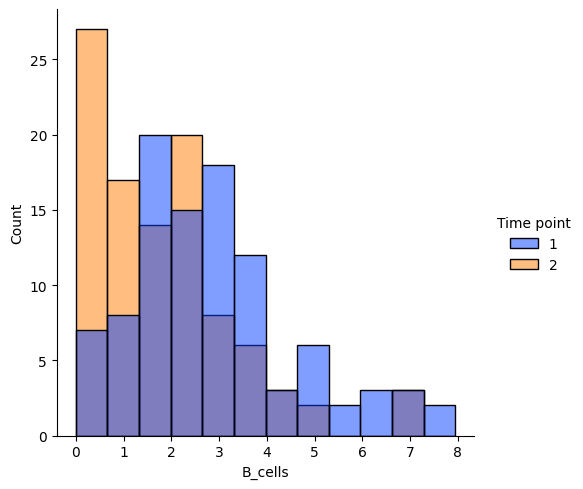

In [29]:
sns.displot(df, x='B_cells', hue='Time point', palette='bright')

In [23]:
df1 = df.loc[df['Time point'] == 1]
df1.head()

,Neutrophils,Eosinophils,Basophils,B_cells,T_cells,NKT_cells,NK_cells,Monocytes,Immature_NK_cells,Mature_NK_CD158+_CD57+,...,gdT_Vdelta2+,gdT_Vdelta2-,Naive_B_cells,Non-switched_Memory_IgM_B_cells,Switched_Memory_IgG+,Switched_Memory_IgA+,Switched_Memory_IgA-_IgG-,Time point,response,donor_num
inds,,,,,,,,,,,,,,,,,,,,,
1,61.409675,0.824102,0.343589,3.844453,19.948739,3.557391,2.919137,9.673985,0.166210,0.438825,...,0.010769,0.900482,2.904248,0.242094,0.279949,0.112244,0.086273,1,0,50
2,64.257310,1.040620,0.335715,1.666845,21.829764,2.095258,5.074820,5.437992,0.203931,0.620319,...,0.102681,0.086994,0.883428,0.162517,0.206272,0.068757,0.110428,1,1,100
4,75.720771,1.039743,0.455274,2.768982,12.462724,0.274928,2.284924,4.608260,0.087786,0.148657,...,0.284012,0.022831,2.556266,0.055930,0.055930,0.045386,0.005043,1,1,78
5,45.240135,4.228360,1.195060,2.705728,25.813921,0.428603,7.068587,12.689077,0.302709,2.281679,...,0.358324,0.040277,1.734958,0.357482,0.182372,0.176724,0.059715,1,1,81
6,52.596696,1.841054,0.490531,2.040435,26.507256,2.603538,8.455367,7.179523,0.153552,1.452642,...,0.325003,0.781079,1.501970,0.140849,0.226854,0.090575,0.035316,1,1,72


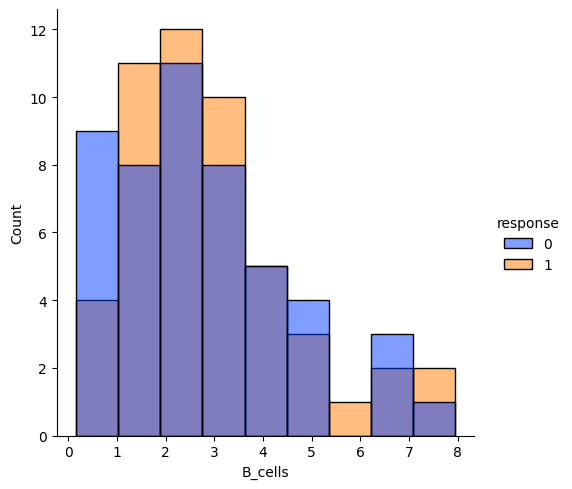

In [31]:
sns.displot(df1, x='B_cells', hue='response', palette='bright')

<Axes: ylabel='B_cells'>

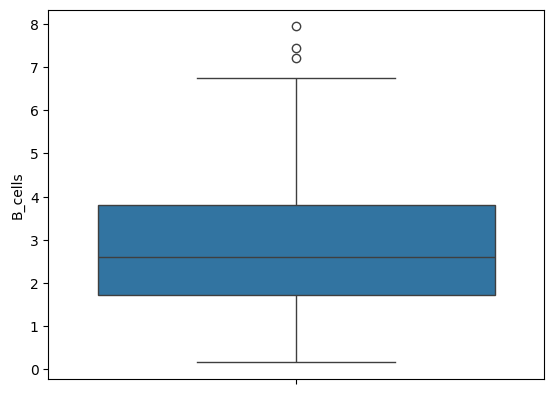

In [47]:
sns.boxplot(df1['B_cells'])

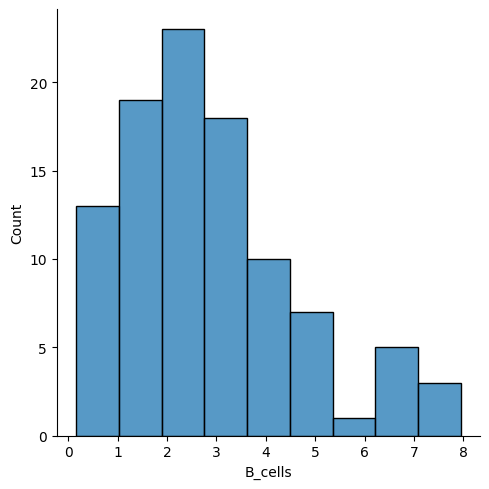

In [46]:
sns.displot(df1['B_cells'])

In [24]:
df2 = df.loc[df['Time point'] == 2]
df2.head()

,Neutrophils,Eosinophils,Basophils,B_cells,T_cells,NKT_cells,NK_cells,Monocytes,Immature_NK_cells,Mature_NK_CD158+_CD57+,...,gdT_Vdelta2+,gdT_Vdelta2-,Naive_B_cells,Non-switched_Memory_IgM_B_cells,Switched_Memory_IgG+,Switched_Memory_IgA+,Switched_Memory_IgA-_IgG-,Time point,response,donor_num
inds,,,,,,,,,,,,,,,,,,,,,
3,73.598340,3.131417,1.105466,2.299966,6.354818,0.067537,4.075060,9.000547,0.126261,0.807166,...,0.037815,0.001964,1.561853,0.597683,0.046239,0.041672,0.018838,2,0,1
7,78.124364,1.100390,0.452387,0.014926,9.868258,0.691069,3.852374,5.600973,0.327657,0.523704,...,0.119626,0.017089,0.004523,0.000452,0.000452,0.002261,0.002714,2,0,41
8,52.440839,14.012227,0.825887,2.020165,19.908586,1.999472,2.965764,6.988133,0.091757,0.266834,...,0.128946,0.719549,1.395880,0.229599,0.128514,0.120387,0.047748,2,1,81
12,58.286925,1.495692,0.288484,2.017532,28.511527,1.229635,1.349499,7.653924,0.313342,0.075347,...,0.850972,0.300405,1.437821,0.441085,0.040099,0.033797,0.027496,2,1,100
13,61.230449,0.366288,0.584866,2.409411,24.363597,1.605113,3.692108,6.616489,0.111659,0.586209,...,0.426367,0.216471,1.612291,0.428804,0.160881,0.106726,0.034836,2,1,76


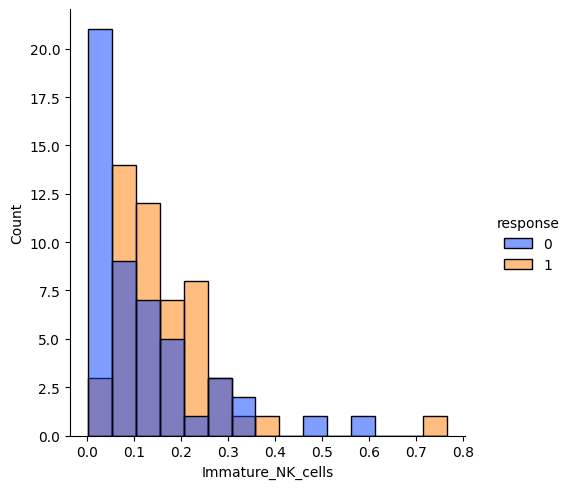

In [39]:
sns.displot(df2, x='Immature_NK_cells', hue='response', palette='bright')

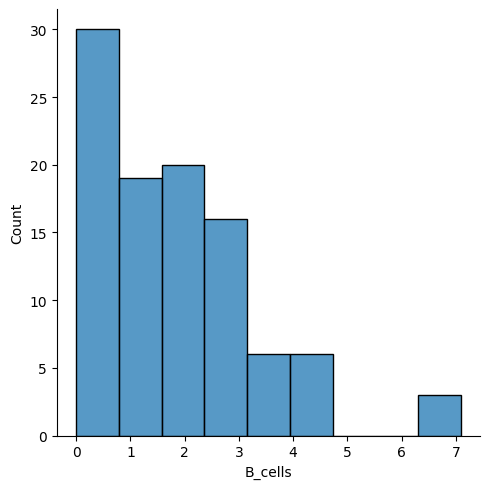

In [45]:
sns.displot(df2['B_cells'])

<Axes: ylabel='B_cells'>

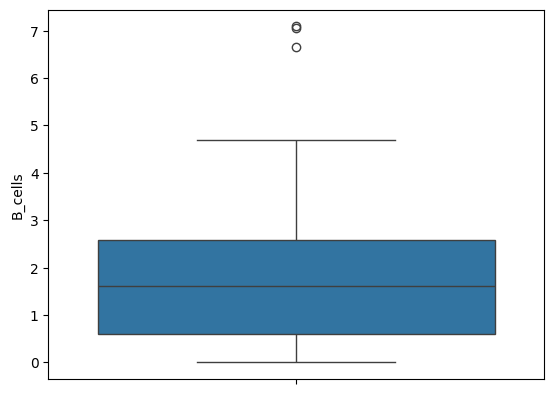

In [44]:
sns.boxplot(df2['B_cells'])

In [20]:
df.loc[df['donor_num'] == 50, 'response']

inds
1      0
151    0
Name: response, dtype: int32

In [6]:
df.shape

(200, 43)

In [12]:
df['Time point'].dtype

dtype('int32')